### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\May_2020\climate_df_May20.pkl")

In [3]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
20,1256372817001496576,[ClimateChange],"a huge win for those who care about #climatechange. 💚\n\nimagine knowing the scientific evidence of climate change and instead of addressing it, working to sow doubt and misinformation. #leeraymond\n\nit’s time for business-as-usual like that to end.",None,False,inclusionchick,Fri May 01 23:59:56 +0000 2020
308,1256372610666987521,[],@startribune alpha news reported sven's twitter retweet which intimately let to his firing. alpha news is a white supremacist supported rag that hires writers from daily caller. both report fake news and challenge climate change and covid19.,StarTribune,False,Skywarn55423,Fri May 01 23:59:07 +0000 2020
888,1256372180083970048,[],"@oldspark2017 ""obama was born in kenya."" ""global warming is a lie of the liberal media."" ""mexico will pay for the wall."" ""another democrat #hoax "" ""15 going to zero."" another term for ""alternative facts"" is ""propaganda lies.""",oldspark2017,False,johnhpetroff,Fri May 01 23:57:24 +0000 2020
1209,1256371951657873409,[],"rt @davemyface: ffs\nthese guys should get a real job!\nfake news again!\n""oyster flatulence worries climate scientists"" \nhttps://t.co/05jrfdt…",None,False,JoRock0011,Fri May 01 23:56:30 +0000 2020
2432,1256371093327294466,[],@sisu_sanity @hateshorseshoes “michael moore is the face of cuban disinformation and organized crime that wishes to steal money from climate change objectives...like gore. they are what climate change experts should run from.” —chris,sisu_sanity,False,DilemmaOfEve,Fri May 01 23:53:05 +0000 2020
2655,1256370927736107011,[Mars],what if #mars has water on it ‘cuz we used to live there &amp; we messed up the climate so badly that we had to send an escape pod to #earth with only #adamandeve &amp; the pod was the asteroid that wiped out #dinosaurs? (source - unknown). #conspiracytheory #conspiracy https://t.co/eat5ntztr3,None,False,ruhela_shanya,Fri May 01 23:52:26 +0000 2020
3369,1256370381021052928,[],"rt @davemyface: ffs\nthese guys should get a real job!\nfake news again!\n""oyster flatulence worries climate scientists"" \nhttps://t.co/05jrfdt…",None,False,AussieFaa,Fri May 01 23:50:15 +0000 2020
4256,1256369666085142530,[climate],"@taravdijk agree w/ first three, 7 #4 may be true for a small number. vast majority of #climate activists, &amp; i know many personally, have been giving of their heart and soul and out of thr own pocket books! for yrs while gibb was driving around country making his outdated &amp; inaccurate ""doc""",taravdijk,False,350orbust1,Fri May 01 23:47:25 +0000 2020
5228,1256368913371152384,[],"@ozikozak strong pressures for political lang to be chameleon, one antidote is more accountability, but problems that are heavily technical + political (climate policy, viruses, global finance) raise strong barriers to public participation &amp; accountability. hence ‘populism’",josephlobianco,False,josephlobianco,Fri May 01 23:44:25 +0000 2020
6070,1256368275371503616,[],rt @fallibleme: global warming alarmists: welcome to reality! decades of fake news and globalist fear-mongering for the sake of a buck gone…,None,False,nonamerule1,Fri May 01 23:41:53 +0000 2020


# Number of tweets

In [4]:
print(f"{len(df)} texts loaded.")

278239 texts loaded.


# Replies

In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'coronavirus': 8062,
         'climatedenial': 7705,
         'climatechange': 4069,
         'GlobalWarming': 3958,
         'lies': 3517,
         'ClimateChange': 3118,
         'climatebrawl': 2814,
         'green': 2763,
         'COVID19': 2265,
         'Coronavirus': 1148,
         'ClimateCrisis': 1113,
         'climate': 1015,
         'ClimateEmergency': 858,
         'ClimateScam': 828,
         'auspol': 669,
         'fossilfuel': 406,
         'Disinformation': 357,
         'misinformation': 333,
         'propaganda': 307,
         'ClimateHoax': 299,
         'Climate': 275,
         'EU': 273,
         'ClimateSkeptics': 266,
         'FaceMasks': 266,
         'FossilFuelIndustry': 252,
         'ParisAgreement': 250,
         'ClimateAction': 247,
         'ClimateChangeHoax': 240,
         'Pandemic': 240,
         'Astroturfing': 240,
         'ThingsTrumpTaughtUs': 235,
         'climatescience': 234,
         'climatecrisis': 226,
         'Planetoft

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateChange
climate
ClimateHoax
ClimateSkeptics
ClimateCrisis
ClimateJustice
climateemergency
ClimateEmergency
ClimateRealist
climatechange
Climate
ClimateChangeHoax
climatebrawl
GlobalWarming
climatehoax
climatebreakdowm
climatecrisis
ClimateCult
ClimateScam
ClimateCapitalists
earth
ClimateFraud
ThereIsNoClimateEmergency
ClimateReality
climatedenial
ClimateAction
Climatechange
ClimateCreationScience
ClimateGate
GlobalPandemics
ClimateScienceDeniers
globalwarming
ClimateChangeIsReal
climatefinance
ClimateDenial
globalist
ClimateTwitter
TeachingClimateCrisis
climatefraud
ClimateLies
ClimateHysteria
ClimateCultists
ClimateCapitalism
ClimateCriminals
GlobalWarmingIsFakeNews
climateaction
ClimateBrawl
climatescience
ClimateSolutions
CoughClimateChange
ClimateAlarmist
Climate_Industrial_Complex
ClimateChangeDeniers
climateactivists
GlobalWarmingCult
climateChangeMatters
climatechangehoax
ClimateCommunism
ClimateCommunist
climatechangehysteria
ClimateCultBS
ClimateVandalism
climatebedweter

In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

hassciencebot      1418
Ceist8             1191
GeraldKutney       1026
AlexZwitter2        969
fcmfcs2019          870
JoeTheAtheist       781
FakeTrumpBot1       750
CymaticWave         661
OutsidersOnSky      619
JaneKBrundage       604
Trey_VonDinkis      554
flude_tom           445
EnergyBoom          416
KSulza              373
0Sundance           334
redmayne_robert     300
kb_leecaster        283
ClimatePatriot      279
TheGreenSwan2       279
climate_fact        264
OscarsWild1         255
LIBERTYSELFGOV      250
DeSmogUK            248
tan123              245
AtomsksSanakan      243
PaprikaLady         240
AJamesW2            235
PamSimson           235
PaulWri29011795     233
CCDHate             229
GrnConservatism     227
SimonPearson961     226
91996340e81d45a     221
ncdave4life         220
thinks_about_it     218
KasierisCan         214
ScienceNotDogma     213
Over400ppm          211
Simon_A_Wood        209
KellyTurberfie1     200
ClimateDepot        200
MikeDel21893959 

# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

180787


97452

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

9345 Unique Tweets


# Bag of words: Climate change

In [3]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [4]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

['huge', 'win', 'care', '#climatechange.', '💚\n\nimagine', 'knowing', 'scientific', 'evidence', 'climate', 'change']


In [6]:
climate_split = [word for word in climate_split if not word in stop_words]

In [7]:
print(climate_split[0:10])

['huge', 'win', 'care', '#climatechange.', '💚\n\nimagine', 'knowing', 'scientific', 'evidence', 'climate', 'change']


In [8]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

KeyboardInterrupt: 

In [17]:
pprint(bow_climate.most_common(20))

[('climate', 198097),
 ('change', 82940),
 ('propaganda', 79116),
 ('conspiracy', 62869),
 ('news', 44745),
 ('like', 36287),
 ('warming', 35459),
 ('fake', 34477),
 ('global', 33019),
 ('misinformation', 32340),
 ('science', 26819),
 ('look', 26643),
 ('think', 24648),
 ('medium', 22154),
 ('disinformation', 22149),
 ('denier', 21613),
 ('theory', 20886),
 ('make', 18126),
 ('coronavirus', 17749),
 ('spread', 17620)]


# WordCloud

In [18]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_May_20.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

134787


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [ ]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(11)


# Hashtag co-occurence


In [3]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [4]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#climatechange', '#leeraymond'],
 ['#mars',
  '#earth',
  '#adamandeve',
  '#dinosaurs',
  '#conspiracytheory',
  '#conspiracy'],
 ['#4', '#climate'],
 ['#climate', '#clim'],
 ['#renewables', '#climatechange', '#climate'],
 ['#covid_19', '#coronavirus'],
 ['#climateskeptics',
  '#coronavirus',
  '#facemasks',
  '#climatechange',
  '#climatecrisis',
  '#fossilfuelindustry',
  '#disinformation',
  '#misinformation',
  '#science',
  '#scientists',
  '#humanactivity',
  '#preventivemeasures',
  '#socialdistancing',
  '#maskwearing'],
 ['#climate', '#clim'],
 ['#climate', '#climatechange', '#fossilfuels'],
 ['#nothanks', '#ud', '#delawhere'],
 ['#news', '#fakenews', '#weather', '#climatechange'],
 ['#news', '#fakenews', '#weather', '#climatechange'],
 ['#climateemergency', '#snow', '#mainstreammedia'],
 ['#climateemergency', '#betterfuture', '#facts', '#science', '#climatebrawl'],
 ['#climatechange', '#covid19'],
 ['#climateskeptics',
  '#coronavirus',
  '#facemasks',
  '#publicopinion',

In [21]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#boycottmurdoch',
 '#oilsands',
 '#newsworthy',
 '#swift',
 '#climatedenial',
 '#spreading',
 '#carbonfootprintscoring',
 '#climatetechcareers',
 '#philippines',
 '#incodewetrusthack',
 '#gatesmustgo',
 '#mec',
 '#aclu',
 '#pinterest',
 '#republicans',
 '#climatecrap',
 '#time4truth',
 '#unseenqueen',
 '#johnsonout110',
 '#coldplay',
 '#netstupids',
 '#climatelies',
 '#nfldraft',
 '#crowdfunded',
 '#strategist',
 '#forum',
 '#bitcoin',
 '#climatecr',
 '#economy',
 '#dickson',
 '#blackliesmatter',
 '#planet',
 '#peoplenotprofit',
 '#cdnmediafailed',
 '#bbc',
 '#greatreplacement',
 '#insurrection',
 '#typhoon',
 '#greathousegiveaway',
 '#wisconsin',
 '#matter',
 '#malmö',
 '#sustainabledevelopment',
 '#elonmuskthepolitician',
 '#hannity',
 '#voteforourchildrenfuture',
 '#russiagohome',
 '#georgechristensen',
 '#energypoverty',
 '#police',
 '#themoreyouknow',
 '#spain',
 '#climatemalarky',
 '#eu',
 '#keepitintheground',
 '#covidiot',
 '#climatejustice',
 '#newage',
 '#ausvotes22',
 '#tm

In [8]:
uni_htags_1 = ['#climatedenial', '#coronavirus',
'#globalwarming', '#lies',
'#climatechange', '#green',
'#climatechange', '#covid19',
'#climatechange', '#climatecrisis',
'#climatecrisis', '#covid19',
'#climatecrisis', '#disinformation',
'#auspol', '#climateemergency',
'#climatebrawl', '#climatecrisis',
'#climatechange', '#propaganda',
'#climateaction', '#climatechange',
'#climatecrisis', '#science',
'#climatechange', '#coronavirus',
'#climatechange', '#misinformation',
'#climatecrisis', '#coronavirus',
'#auspol', '#boy',
'#boy', '#climateemergency',
'#disinformation', '#science',
'#coronavirus', '#covid19',
'#disinformation', '#misinformation',
'#climatebrawl', '#climatechange',
'#covid19', '#disinformation',
'#climatecrisis', '#misinformation',
'#climatechange', '#disinformation',
'#climatechange', '#science',
'#coronavirus', '#disinformation',
'#climatechange', '#socialdistancing',
'#climatechange', '#conspiracy',
'#coronavirus', '#misinformation',
'#disinformation', '#fossilfuelindustry',
'#fossilfuelindustry', '#science',
'#misinformation', '#science',
'#climatechange', '#planetofthehumans',
'#climatecrisis', '#fossilfuelindustry',
'#coronavirus', '#science',
'#climatechange', '#maskwearing',
'#climateskeptics', '#maskwearing',
'#coronavirus', '#maskwearing',
'#disinformation', '#maskwearing',
'#facemasks', '#maskwearing',
'#maskwearing', '#misinformation',
'#maskwearing', '#preventivemeasures',
'#maskwearing', '#science',
'#maskwearing', '#scientists',
'#maskwearing', '#socialdistancing',
'#climatecrisis', '#pandemic',
'#surgeafrica', '#surgexmedia',
'#climatechange', '#scientists',
'#misinformation', '#scientists',
'#science', '#scientists']

uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#auspol', '#climatecrisis', '#fossilfuelindustry', '#boy', '#facemasks', '#disinformation', '#climateskeptics', '#conspiracy', '#propaganda', '#maskwearing', '#coronavirus', '#preventivemeasures', '#climatebrawl', '#science', '#lies', '#surgeafrica', '#green', '#climateaction', '#surgexmedia', '#climatedenial', '#planetofthehumans', '#climateemergency', '#misinformation', '#pandemic', '#globalwarming', '#covid19', '#scientists', '#climatechange', '#socialdistancing']


In [9]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [10]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [11]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

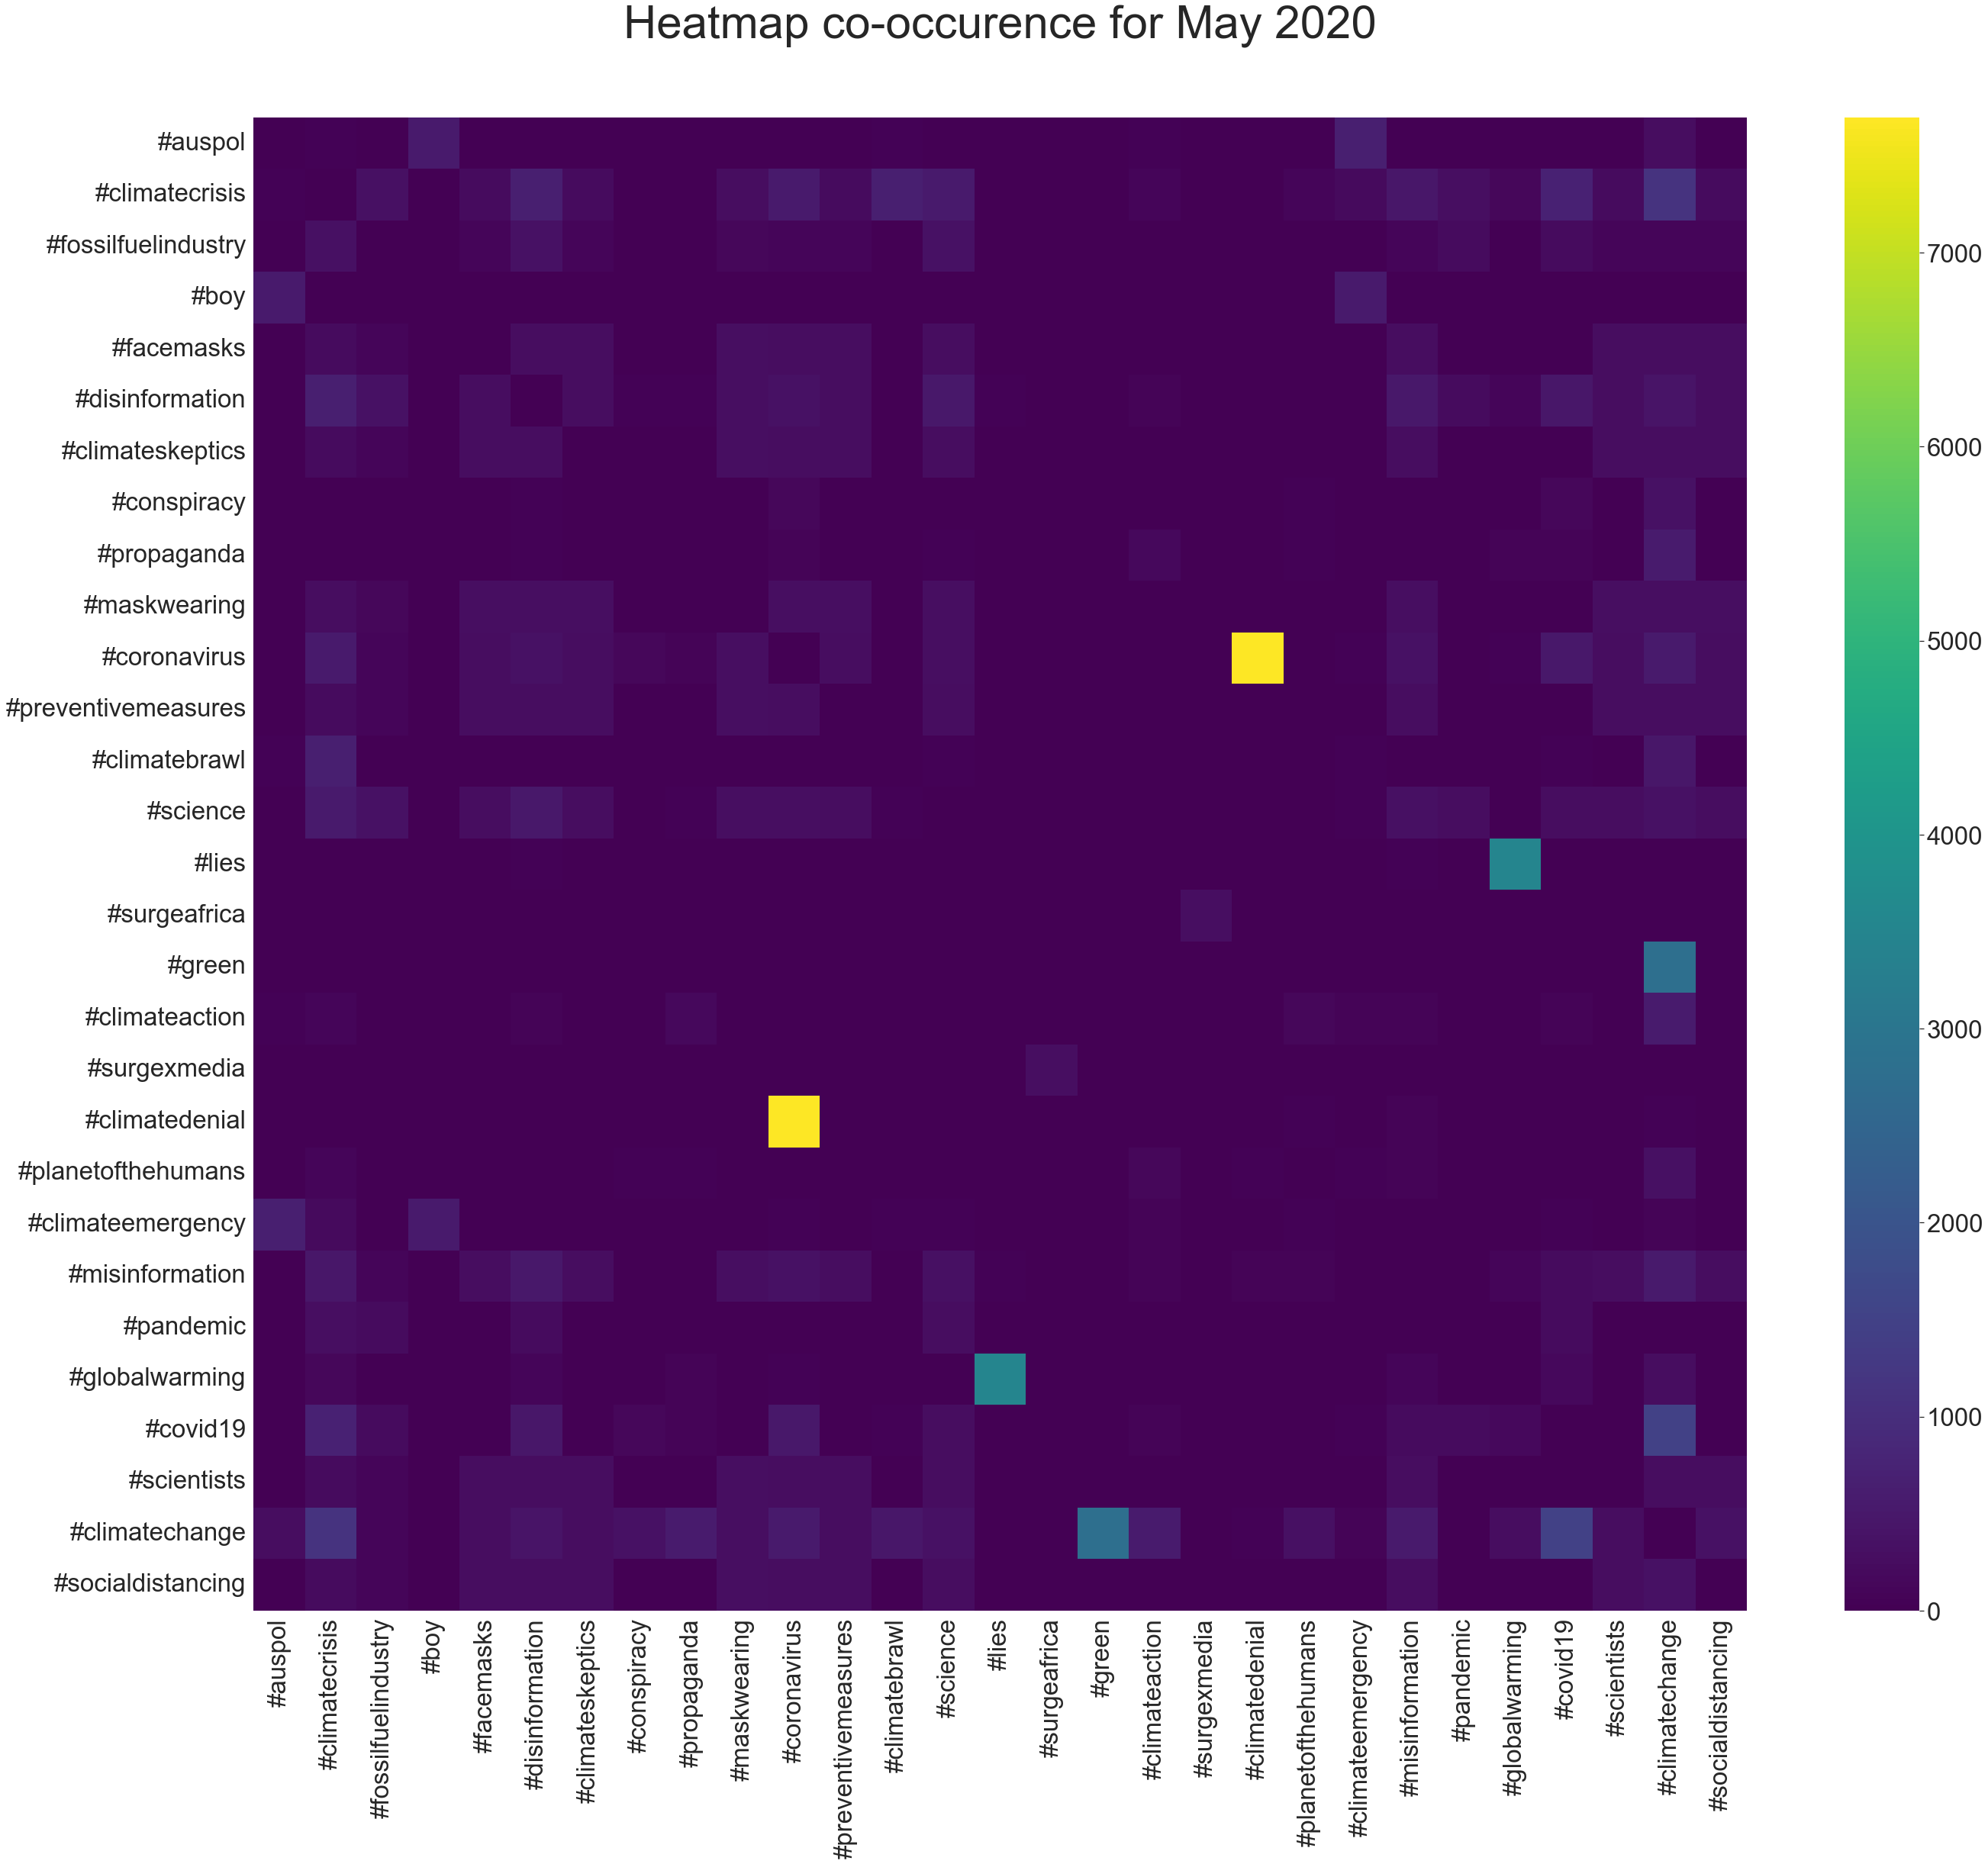

In [18]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis', vmax=7697)
plt.title("Heatmap co-occurence for May 2020", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_May20.png")

In [6]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatedenial', '#coronavirus'), 7697),
 (('#globalwarming', '#lies'), 3517),
 (('#climatechange', '#green'), 2791),
 (('#climatechange', '#covid19'), 1488),
 (('#climatechange', '#climatecrisis'), 1127),
 (('#climatecrisis', '#covid19'), 712),
 (('#climatecrisis', '#disinformation'), 659),
 (('#auspol', '#climateemergency'), 642),
 (('#climatebrawl', '#climatecrisis'), 632),
 (('#climatechange', '#propaganda'), 559),
 (('#climateaction', '#climatechange'), 550),
 (('#climatecrisis', '#science'), 536),
 (('#climatechange', '#coronavirus'), 532),
 (('#climatechange', '#misinformation'), 532),
 (('#climatecrisis', '#coronavirus'), 517),
 (('#auspol', '#boy'), 515),
 (('#boy', '#climateemergency'), 515),
 (('#disinformation', '#science'), 506),
 (('#coronavirus', '#covid19'), 505),
 (('#disinformation', '#misinformation'), 488),
 (('#climatebrawl', '#climatechange'), 467),
 (('#covid19', '#disinformation'), 455),
 (('#climatecrisis', '#misinformation'), 452),
 (('#climatechange', '#d

<AxesSubplot:>

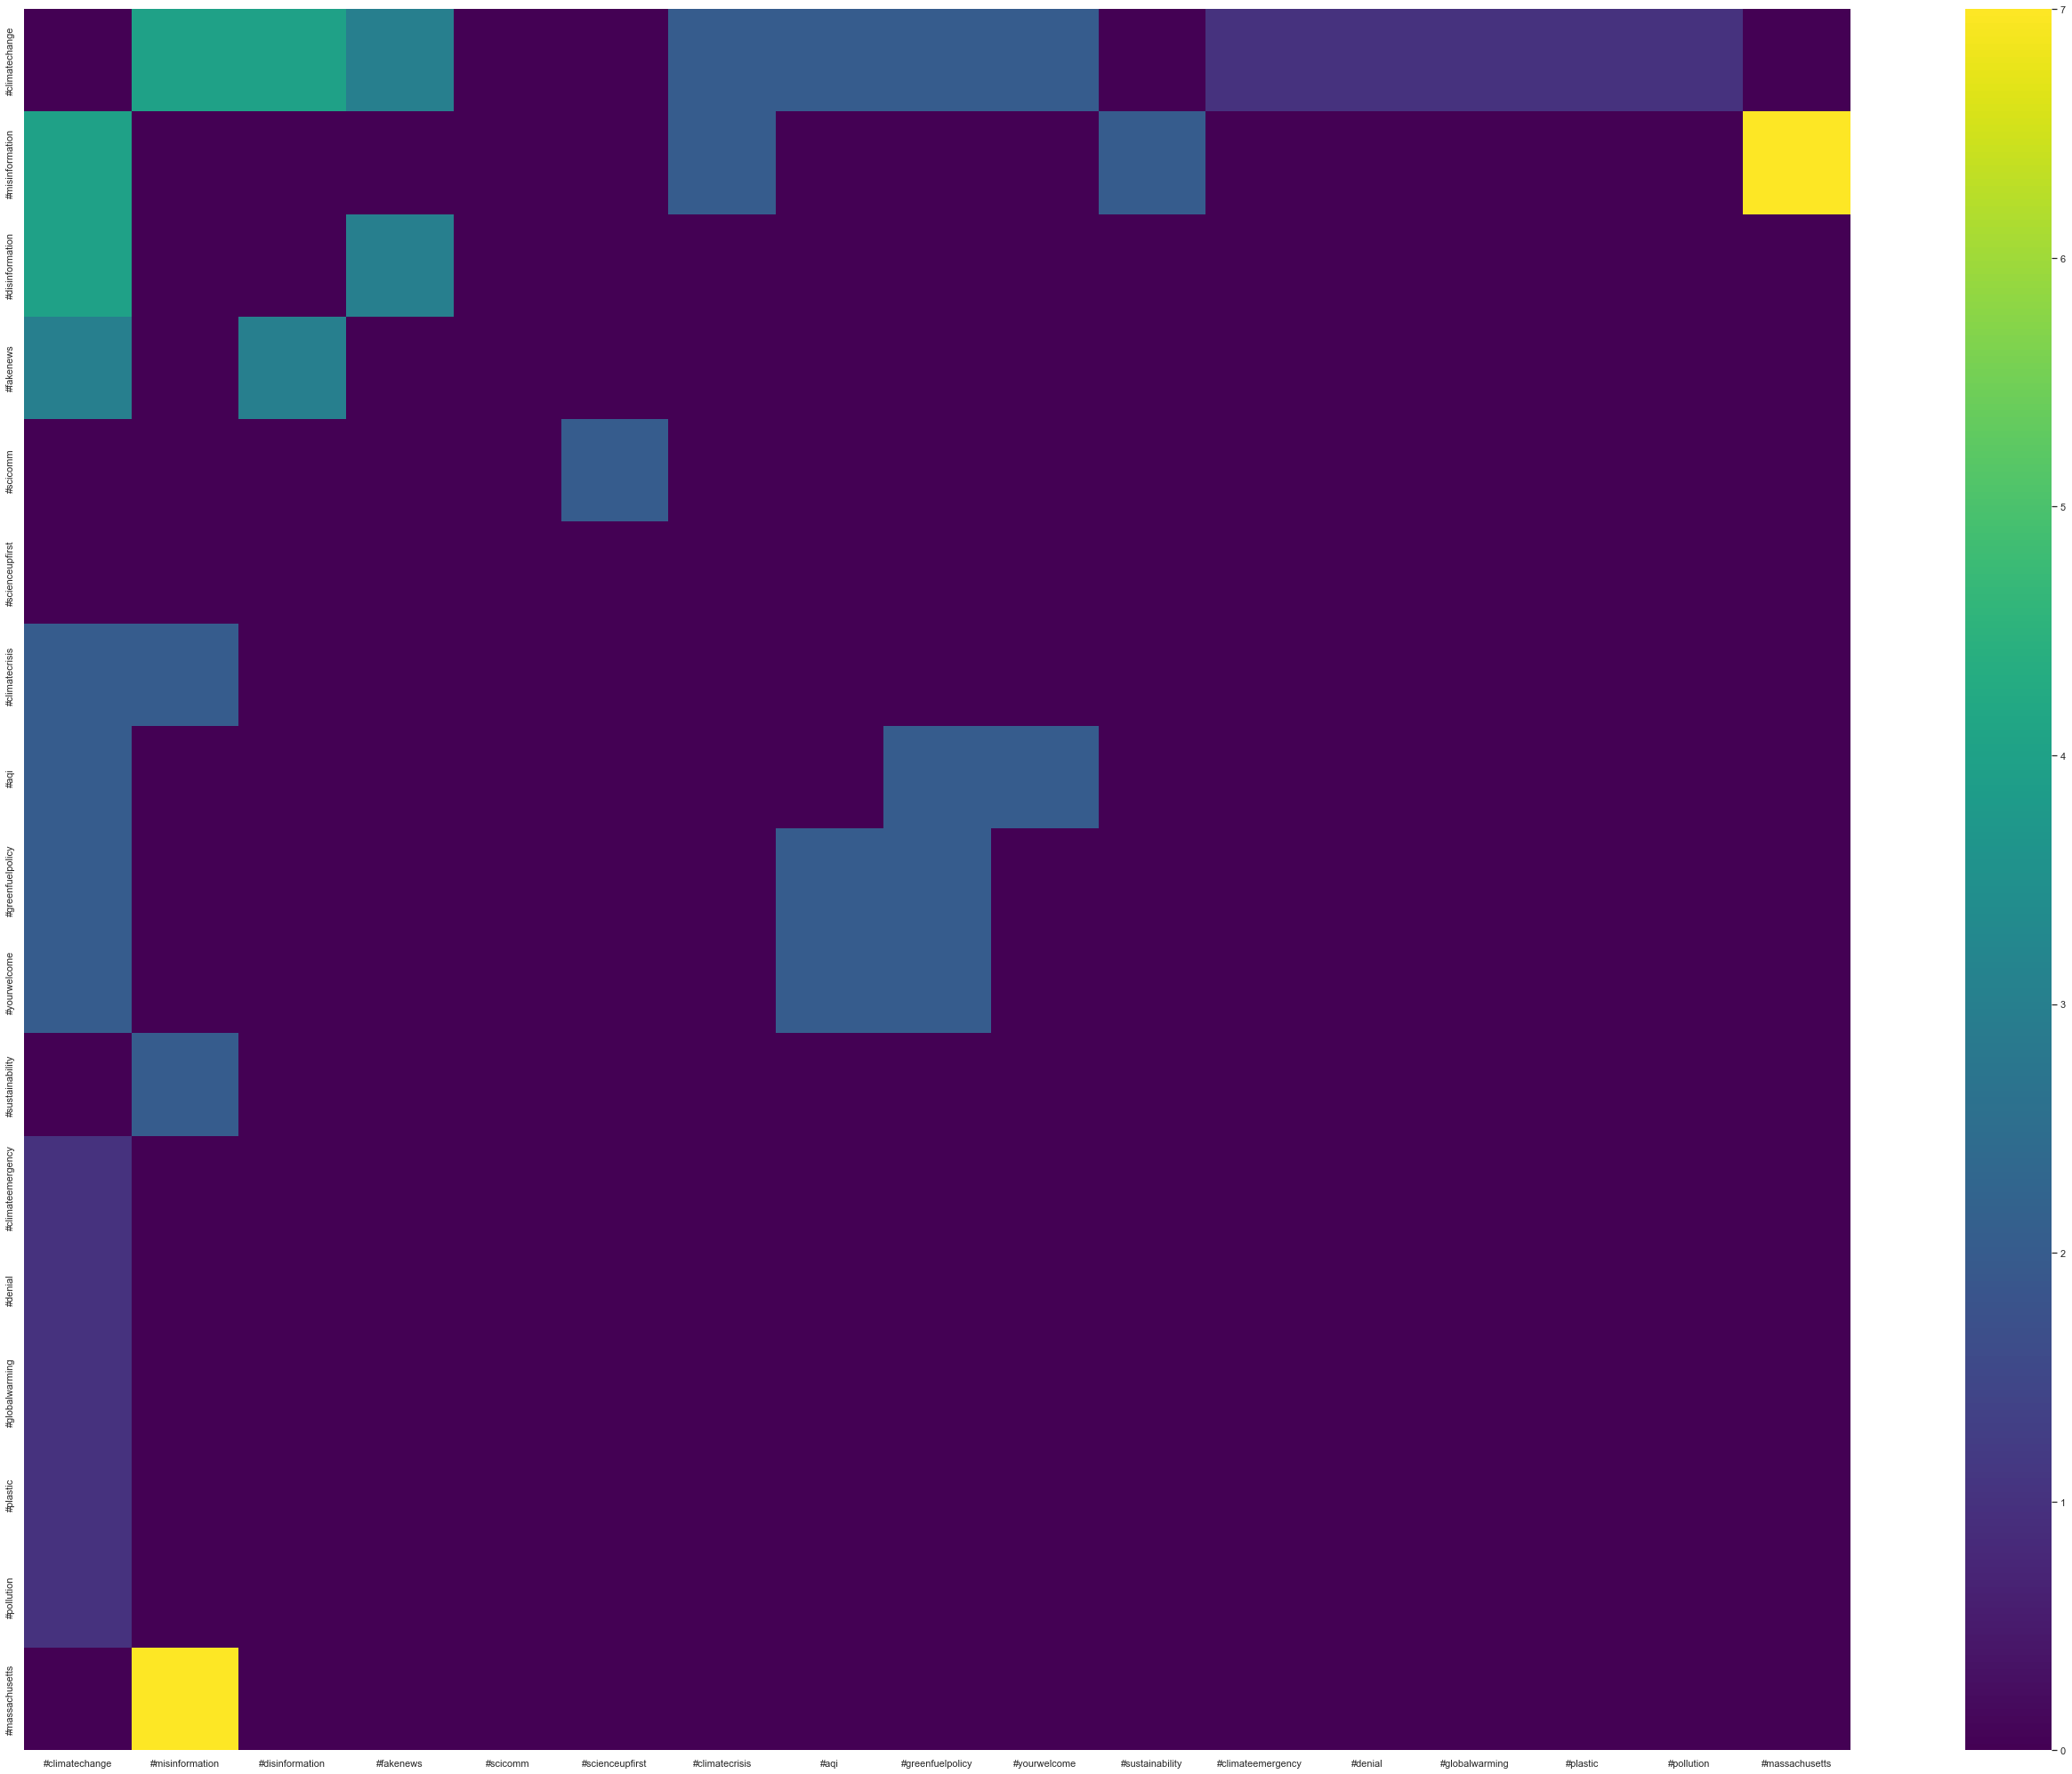

In [94]:
# heatmap_df = pd.DataFrame(data=htag_keys, columns=htag_co, index=htag_co)
# sns.heatmap(heatmap_df, square=False, cmap='viridis')

# Most common hashtags

In [27]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 11296),
 ('#coronavirus', 9827),
 ('#climatedenial', 7897),
 ('#globalwarming', 4330),
 ('#lies', 3615),
 ('#covid19', 3502),
 ('#climatebrawl', 3358),
 ('#climatecrisis', 3131),
 ('#green', 2828),
 ('#climate', 2102)]

# Concordance

In [52]:
print(climate_strings[0:10000])

 fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi has those crazy climate scientists superceded poopy fake news too far?  hey, peter! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon  hey, dave! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon rt : it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:
1. climate breakdown is actual… rt : this is weird conspiracy theory prepper bullshit. this is a sob

In [61]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("climate", width=150, lines=50)

Displaying 50 of 186111 matches:
rt : a common trick used in climate propaganda is to use very bigly numbers and keep biggering and biggeri
 bogus bail charge.
the uk's national security state wants to induce a climate of fear, destroy…  lol!  you are so funny, too bad most of us know the
of fear, destroy…  lol!  you are so funny, too bad most of us know the climate action act was deep state and luciferian! rt :  anti-climate change pr
da,   is telling people the world is going to end in 12 yrs because of climate change. rt : bbc and attenborough accused of fake news misinformation 
he facts’
https://t.co/vsrrjreik0  this is fake news. you are peddling climate outrage. rt : assange sentenced 50 weeks for bogus bail charge.
the uk
 bogus bail charge.
the uk's national security state wants to induce a climate of fear, destroy…  do you think that there will be a point in the futu
ace criminal charges for intentionally misleading to prevent action on climate change? i mean at a point where

In [5]:
res = []
for index, row in df.iterrows():
    if "#auspol" in row.tweet_text:
        res.append(row.tweet_text)
        
res[0:100]

['@climateworrier @joe_hildebrand @danielandrewsmp the interesting thing about leftists is they attempt to hide facts by labelling them as "conspiracy theories".  victoria has borrowed money from communist china paul.  what magical "workings of government" am i missing? #auspol',
 '"get full digital access to trusted news from the herald sun &amp; leader for just $1 for the first 28 days."\n\n"trusted news"?\nbetter described as: cynical, dumbed-down, dog-whistling, pro-business, murdoch-censored, climate-denying, anti-intellectual conservative propaganda.\n#auspol',
 '@climateworrier @joe_hildebrand @danielandrewsmp the interesting thing about leftists is they attempt to hide facts by labelling them as "conspiracy theories".  victoria has borrowed money from communist china paul.  what magical "workings of government" am i missing? #auspol',
 '"get full digital access to trusted news from the herald sun &amp; leader for just $1 for the first 28 days."\n\n"trusted news"?\nbetter descri

# Random tweets


In [59]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

64899091    rt @pokershash: modi’s\n\n15 lakh: never promised\n2 crore job: false, never promised\nclimate not changed: clipped, false propaganda\n\nrahul’s…
50598383         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
3622513         rt @sankrant: fake news. world over in hot tropical climates native women were often bare chested,\nas men were. western women’s “bra-burnin…
61405454         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
51885812         rt @khayhoe: usgs director reilly, a former astronaut and petroleum geologist, claims the national climate assessment used "inaccurate mode…
25214999                                                  people who call climate change "liberal propaganda" are the same people who think the earth is flat
50715721         rt @ecosensenow: the “climate crisi

In [105]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('#Massachusetts is proceeding with a lawsuit against ExxonMobil for spreading '
 '#misinformation about c

# TF-IDF

In [5]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [6]:
len(no_retweets)

46000

In [7]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [8]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [11]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.5].sort_values(ascending=False)

In [12]:
tokens_above_threshold

gt                            0.996859
disinformation                0.935318
beep                          0.904349
whing                         0.898014
feminism                      0.874024
giggs                         0.862980
anti                          0.857641
fake                          0.841380
bwzm7b5kxf                    0.828305
lie                           0.808265
flob4lao9d                    0.801125
agenda                        0.798952
hfhtvrkfob                    0.796590
m8lqm1frov                    0.792567
office                        0.789654
wkmscvwgkn                    0.788931
dumb                          0.774806
model                         0.772237
excruciate                    0.771956
potus                         0.770559
fight                         0.764360
climatehoax                   0.757253
anthropogenic                 0.755410
1vzqiq0aov                    0.749041
au1hpwi80y                    0.727850
8vzdjjr4uh               